# Anomaly detection algorithms

Unsupervised anomaly detection algorithms can detect data that does not belong to normal data patterns. In general, it looks for isolated samples, samples that are in low-density regions. Anomaly detection algorithms can be divided into several approaches such as:

-	Density based 
-	Distance based 
-   Kernel based
-	Statistical approaches
-	Tree-based methods 

In this notebook we test a few of these algorithms. The Local Outlier Factor, robust covariance, One Class Support Vector Machine, Isolation Forest is a tree-based.


**Local Outlier Factor** LOF compares the density of any given data point to the density of its neighbors. Since outliers come from low-density areas, the ratio will be higher for anomalous data points. As a rule of thumb, a normal data point has a LOF between 1 and 1.5 whereas anomalous observations will have much higher LOF. The higher the LOF the more likely it is an outlier (2).
Density-based methods identify anomalies based on the local density of data points. Anomalies are detected as points that have significantly lower density compared to their neighboring points. Another example next to LOF is  DBSCAN.

**Distance-based** methods determine anomalies by measuring the distance or dissimilarity of data points to their neighboring points. Points that are significantly distant or dissimilar from others are considered anomalies. Examples include k-nearest neighbors (k-NN), distance-based outlier detection (e.g., using Mahalanobis distance or Euclidean distance), and angle-based outlier detection. 

The **robust covariance** method is a **gaussian elipse-based method**. If it is outside the gaussian curve, or on the edges it might be an outlier. It is based on the Mahalanobis distance which assesses how many standard deviations σ away xᵢ is from μ. An extreme observation has a large distance from the center of a distribution. An envelope around the data set can be constructed by choosing a critical value of the Mahalanobis distance. Points outside this envelope are considered anomalies/outliers. (1)

**One Class Support Vector Machine** is cluster method based on the Support Vector Machine algorithm. Instead of separating classes into clusters, it separates one class from the origin. The points outside the boundary line are classified as outliers. It uses kernels. The default kernel is ‘rbf’ since most of the time the boundary is not linear. (3)

**Isolation Forest is a tree-based** method. The Isolation Forest algorithm does not explicitly consider density or neighborhood relationships between data points. Instead, it uses the idea that anomalies can be identified more quickly and easily in the tree structure compared to normal data points. Anomalies are expected to have shorter paths in the tree, as they require fewer splits to be isolated. It uses partitioning to make isolated trees, with the goal that each point is isolated. The more partitioning is needed, the more chance a data point is a regular point. An outlier is much easier to isolate than a regular point.  (4)



[1] Nascimento et all. "A cluster-based algorithm for anomaly detection in time series using Mahalanobis distance." Proceedings on the International Conference on Artificial Intelligence (ICAI). The Steering Committee of The World Congress in Computer Science, Computer Engineering and Applied Computing (WorldComp), 2015. 

[2] Alghushairy, Omar, et al. "A review of local outlier factor algorithms for outlier detection in big data streams." Big Data and Cognitive Computing 5.1 (2020): 1.

[3] Schölkopf, Bernhard, et al. "Support vector method for novelty detection." Advances in neural information processing systems 12 (1999).

[4] Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. "Isolation-based anomaly detection." ACM Transactions on Knowledge Discovery from Data (TKDD) 6.1 (2012): 1-39.



# Hypothesis

Anomaly detection techniques are commonly employed in predictive maintenance strategies to identify abnormal patterns or behaviors in machine data that may indicate impending failures.

By monitoring various sensor readings, operational parameters, or other relevant data from machines, anomaly detection algorithms can learn the normal behavior or expected patterns of the machines during their normal operation. When a deviation from the normal behavior is detected, it may indicate a potential failure or malfunction. The hypothesis is that the sensor readings of a pump will generate not normal values in case of an (upcoming) failure, and these can be determined with anomaly detection. Several algorithms will be used to evaluate the hypothesis 

datasource: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

## Assignment

Choose at least 1 out of the listed assignments

- Analyze the end result plot to evaluate the algorithm's performance. Look for anomalies identified by the algorithm and compare them to known anomalies or instances of abnormal behavior in the data. Assess whether the algorithm successfully captures these anomalies and if it shows promising results in detecting abnormal patterns. Based on the plot analysis, provide argumentation for the validity of the anomaly detection algorithm hypothesis (see above). Discuss how the algorithm effectively captures anomalies in the time series data and why it is a suitable approach for the use case. Support your argument with references to relevant literature that discuss the effectiveness of the chosen algorithm or similar algorithms in detecting anomalies in time series data.

- To improve data quality for anomaly detection in time series data, we can focus on removing outliers due to sensor reading errors while preserving anomalies. Additionally, performing resampling or aggregation can help reduce noise and highlight higher-level patterns relevant for anomaly detection. Find common steps to improve data quality for this particular use and implement those. Evaluate the performance of the algorithms compare to the original notebook. 

- Try another algorithm that has not been tested in the notebook. Provide argumentation for the validity of the anomaly detection algorithm you choose. 
- Try to find the best configuration for one of the tested algorithms
- Try anomaly detection on a different dataset without timeseries data. Evaluate the outcome


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# The data

In [12]:
# source: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

df = pd.read_csv('sensor.csv').drop('Unnamed: 0', axis=1)
df_origin = df.copy()
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


## Inspect data

In [13]:
df.shape

(220320, 54)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [15]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [16]:
#missing values
percentage_missing = df.isnull().sum().sort_values(ascending=False)/len(df)*100
percentage_missing.head() # show 5 largest missing %

sensor_15    100.000000
sensor_50     34.956881
sensor_51      6.982117
sensor_00      4.633261
sensor_07      2.474129
dtype: float64

In [17]:
# drop low quality columns
df.drop(['sensor_15', 'sensor_50'],inplace = True,axis=1)
# set timestamp to date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [18]:
# 3 unique values - NORMAL, BROKEN and RECOVERING

df[(df['machine_status'] == 'BROKEN')]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,36.979160,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,324.6528,BROKEN
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,29.947916,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,183.7384,BROKEN
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,31.250000,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,257.5231,BROKEN
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,176.822900,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,267.3611,BROKEN
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,24.739580,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,NaN,BROKEN
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,32.812500,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,174.7685,BROKEN
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,36.458330,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,205.7292,BROKEN


In [19]:
df[(df['machine_status'] == 'RECOVERING')]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:56:00,0.000000,53.55902,52.777770,43.402775,204.725098,53.74214,3.045428,17.42621,15.740740,16.17477,...,36.979164,49.479160,50.34722,51.21528,49.18982,49.47917,431.7130,133.1019,341.7245,RECOVERING
2018-04-12 21:57:00,0.000000,53.55902,52.777770,43.402775,201.137131,52.49996,7.537616,13.53443,9.324364,16.05179,...,36.979160,48.177080,49.76852,50.92593,48.03241,53.81944,451.3889,140.0463,466.1458,RECOVERING
2018-04-12 21:58:00,0.000000,52.77777,52.690970,43.402770,204.030655,57.19875,7.609953,16.60880,16.203700,16.09520,...,36.718750,46.875000,48.03241,50.34722,47.45370,58.15972,466.4352,144.9653,366.0301,RECOVERING
2018-04-12 21:59:00,0.000000,52.60416,52.734370,43.446180,203.567688,50.96181,7.573785,16.70284,16.160300,16.08796,...,36.718750,45.833330,47.45370,49.76852,46.58565,63.65741,474.8264,149.0162,374.4213,RECOVERING
2018-04-12 22:00:00,NaN,52.51736,52.690970,43.446180,203.567688,49.78948,7.559317,16.56539,16.239870,16.05179,...,36.718750,44.270830,46.29630,48.03241,45.13889,75.23148,477.7199,162.6157,356.1921,RECOVERING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-25 15:11:00,0.310880,46.48438,51.171870,46.527775,152.526031,60.77931,15.089700,17.62876,18.200230,16.39902,...,54.687500,59.895830,77.83565,73.78472,58.44907,58.15972,295.4283,260.4167,211.2269,RECOVERING
2018-07-25 15:12:00,0.304977,46.39757,51.085070,46.527770,152.178802,61.24545,15.089700,17.62153,18.243630,16.31944,...,53.906250,58.854160,75.81019,69.44444,56.71296,58.15972,278.9352,244.2130,195.0231,RECOVERING
2018-07-25 15:13:00,0.303993,46.31076,51.085070,46.484380,151.021393,52.94817,15.125870,17.62153,18.236400,16.35561,...,53.645830,57.552080,81.30787,65.10416,53.81944,60.47454,267.9398,229.1667,180.5556,RECOVERING


Once a breakdown occurs, the status is marked as "Recovering" until it returns to "Normal." In total, there have been 7 instances of breakdowns.

In [20]:
df[(df['machine_status'] == 'RECOVERING')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14477 entries, 2018-04-12 21:56:00 to 2018-07-25 15:15:00
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sensor_00       4283 non-null   float64
 1   sensor_01       14447 non-null  float64
 2   sensor_02       14472 non-null  float64
 3   sensor_03       14472 non-null  float64
 4   sensor_04       14472 non-null  float64
 5   sensor_05       14472 non-null  float64
 6   sensor_06       9693 non-null   float64
 7   sensor_07       9040 non-null   float64
 8   sensor_08       9384 non-null   float64
 9   sensor_09       9896 non-null   float64
 10  sensor_10       14472 non-null  float64
 11  sensor_11       14472 non-null  float64
 12  sensor_12       14472 non-null  float64
 13  sensor_13       14472 non-null  float64
 14  sensor_14       14477 non-null  float64
 15  sensor_16       14477 non-null  float64
 16  sensor_17       14477 non-null  float64
 

During the "Recovery" status, sensor00, sensor06, sensor07, sensor08, and sensor09 exhibit a higher frequency of missing values.

In [21]:
#Examine the characteristics of sensors during both the "Normal" and "Recovery" statuses to identify distinct variations

columns = ['sensor_00','sensor_06','sensor_07','sensor_08','sensor_09']

In [22]:
for column in columns:
    print('{0} Normal'.format(column))
    display(df[(df['machine_status'] == 'NORMAL')][column].describe())
    print('{0} In Recovery'.format(column))
    display(df[(df['machine_status'] == 'RECOVERING')][column].describe())

sensor_00 Normal


count    205822.000000
mean          2.420476
std           0.242472
min           0.000000
25%           2.444734
50%           2.456539
75%           2.499826
max           2.549016
Name: sensor_00, dtype: float64

sensor_00 In Recovery


count    4283.000000
mean        0.055215
std         0.163270
min         0.000000
25%         0.001968
50%         0.001968
75%         0.109201
max         2.318808
Name: sensor_00, dtype: float64

sensor_06 Normal


count    205822.000000
mean         13.865073
std           0.864943
min           0.014468
25%          13.382520
50%          13.679110
75%          14.568870
max          15.964990
Name: sensor_06, dtype: float64

sensor_06 In Recovery


count    9693.000000
mean        5.784861
std         5.082390
min         0.014468
25%         0.028935
50%         6.553819
75%        10.098380
max        22.251160
Name: sensor_06, dtype: float64

sensor_07 Normal


count    205822.000000
mean         16.165959
std           0.600457
min           0.028935
25%          15.950520
50%          16.167530
75%          16.427950
max          19.133390
Name: sensor_07, dtype: float64

sensor_07 In Recovery


count    9040.000000
mean        8.495140
std         7.110821
min         0.000000
25%         0.036169
50%        11.349830
75%        13.809320
max        23.596640
Name: sensor_07, dtype: float64

sensor_08 Normal


count    205822.000000
mean         15.478129
std           0.588606
min           0.028935
25%          15.183740
50%          15.494790
75%          15.697340
max          19.538480
Name: sensor_08, dtype: float64

sensor_08 In Recovery


count    9384.000000
mean        9.117674
std         6.991981
min         0.028935
25%         0.028935
50%        11.140050
75%        12.745950
max        24.348960
Name: sensor_08, dtype: float64

sensor_09 Normal


count    205822.000000
mean         15.086662
std           0.572969
min           0.007234
25%          15.053530
50%          15.082470
75%          15.118630
max          18.988710
Name: sensor_09, dtype: float64

sensor_09 In Recovery


count    9896.000000
mean        8.822057
std         7.149103
min         0.000000
25%         0.007234
50%        11.291960
75%        15.053530
max        25.000000
Name: sensor_09, dtype: float64

Noticeable variations exist in both the average and standard deviation between the "Normal" and "Recovery" statuses. This indicates an abrupt shift when a failure or breakdown takes place. This shift is also responsible for the increased occurrence of null values in the sensor data.

In [23]:
import matplotlib.dates as mdates

def plot_broken(df, broken_number):
    """arguments : df dataframe using for plot
                   broken ones from one to seven in the time_limits
    """
    # Time limit according to the timestamp in Broken machine status
    time_limits = {
        'First': ('2018-04-12 12:00:00', '2018-04-14 12:00:00'),
        'Second': ('2018-04-17 12:00:00', '2018-04-19 12:00:00'),
        'Third': ('2018-05-18 20:00:00', '2018-05-20 20:00:00'),
        'Fourth': ('2018-05-24 12:00:00', '2018-05-26 12:00:00'),
        'Fifth': ('2018-06-28 12:00:00', '2018-06-30 12:00:00'),
        'Sixth': ('2018-07-07 12:00:00', '2018-07-09 12:00:00'),
        'Seventh': ('2018-07-24 12:00:00', '2018-07-26 12:00:00')
    }
    # Check if the broken number exists in the dictionary
    if broken_number not in time_limits:
        options = ', '.join(time_limits.keys())
        print(f"Invalid broken number '{broken_number}'. Available options: {options} (enclosed in quotes)")
        return
    # Get the corresponding time limit based on broken number
    time_start, time_end = time_limits[broken_number]

    #only taking the machine status
    #plot for all columns
    #columns = list(data.columns)
    #for column in columns:
    column = df.columns[-1]

    # Plotting the corresponding broken
    fig, ax = plt.subplots(figsize=(18,5))
    plt.xticks(rotation=90)
    ax.plot(df.loc[time_start:time_end, column], marker='X', linestyle='-.',color='grey', markersize=10,markerfacecolor='red')
    plt.grid(True) 
    ax.set_ylabel('Reading Unit')
    ax.set_title('{0} Broken: {1} Reading'.format(broken_number, column))
    # Set x-axis major ticks to hourly interval
    ax.xaxis.set_major_locator(mdates.HourLocator())
    # Format x-tick labels as HH:MM
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    plt.show()

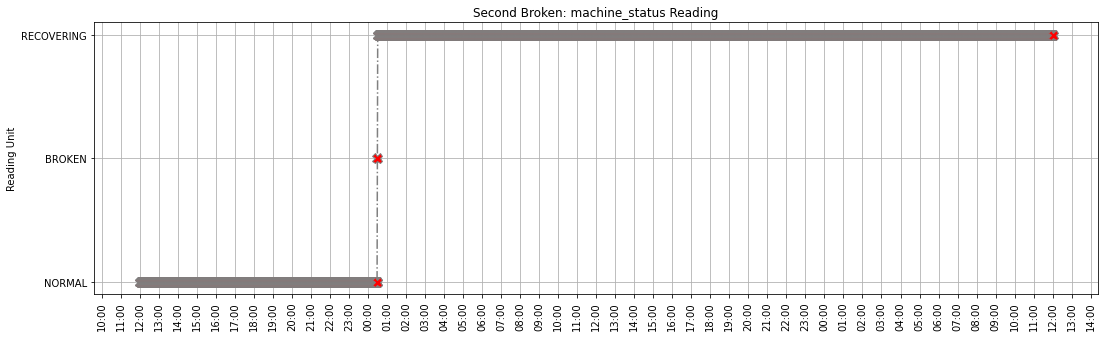

In [24]:
plot_broken(df,'Second')

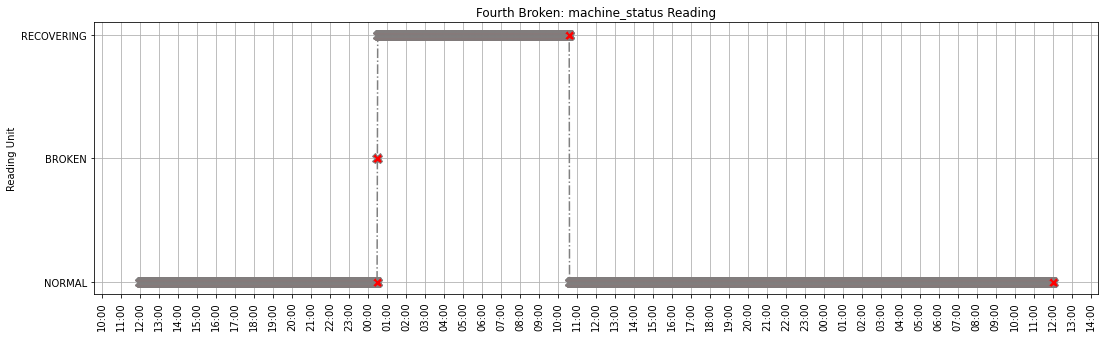

In [25]:
plot_broken(df,'Fourth')

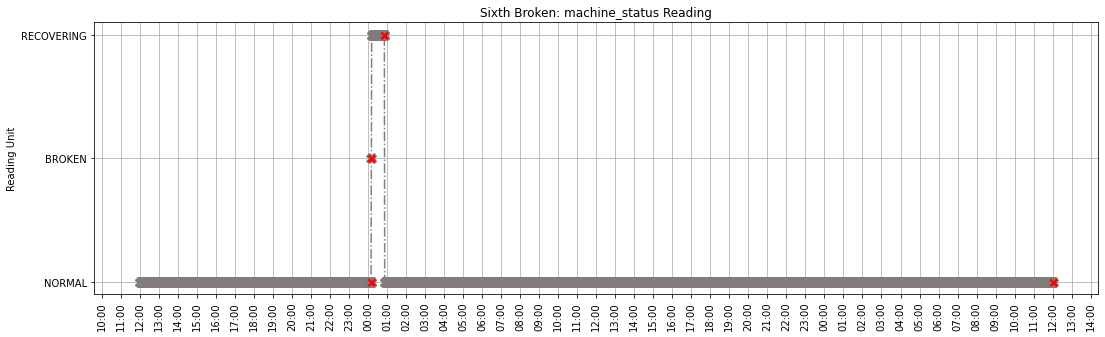

In [27]:
plot_broken(df,'Sixth')

By examining the plots for each instance of a breakdown, it's evident how much time was required for recovery. The second and fourth breakdowns had prolonged recovery periods exceeding 38 hours, whereas the sixth breakdown experienced the shortest recovery time of less than 1 hour.

In [28]:
# This visualization inspired from JANANI KARIYAWASAM found at 
# https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']

def plot_sensor(sensor):
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering')
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14, label = 'broken')
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

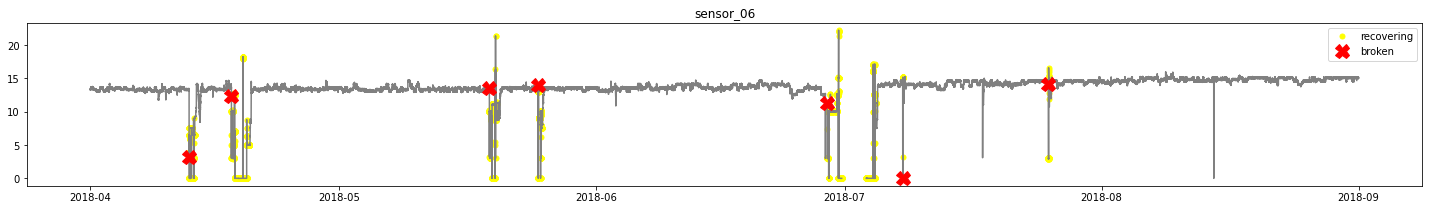

In [29]:
# plot sensor 51
plot_sensor('sensor_06')

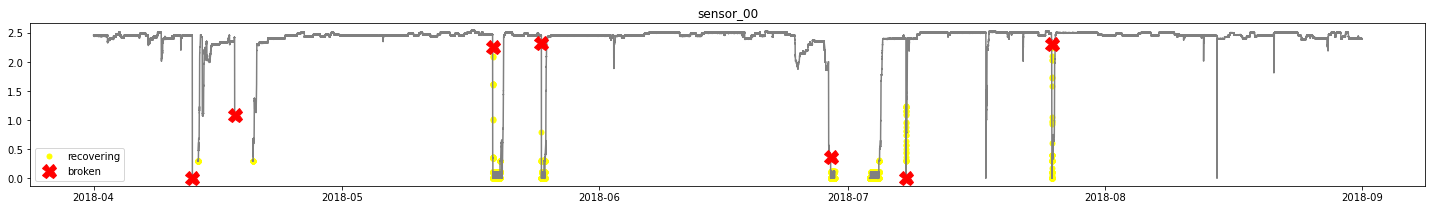

In [30]:
plot_sensor('sensor_00')

## Further work in Plots

Creating visual representations for the machine status of sensors during both breakdown and recovery

In [31]:

# Readings from the Broken state of the pump
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
df_2 = df.drop(['machine_status'],axis=1)



In [32]:
# timeseries for each sensor with Broken and recovery state
def plot_machine_plot(sensors):
    for sensor in sensors:
        plt.figure(figsize=(18,3))
        plt.plot(broken_rows[sensor],linestyle='none',marker='X',color='red',markersize=12,label = "Broken")
        plt.plot(recovery_rows[sensor],linestyle='none',marker='o',color='yellow',markersize=4,label = "Recovery")
        plt.plot(df[sensor],color='grey')
        plt.title(sensor)
        plt.legend()
        plt.show()

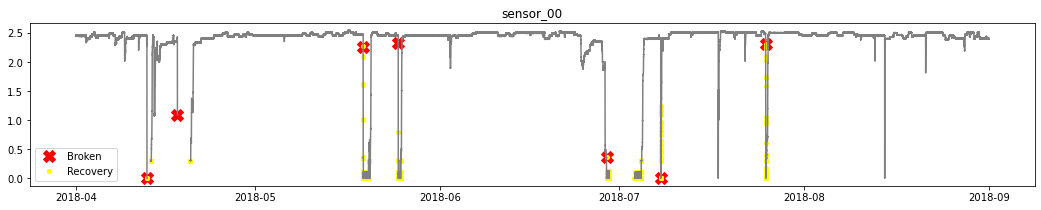

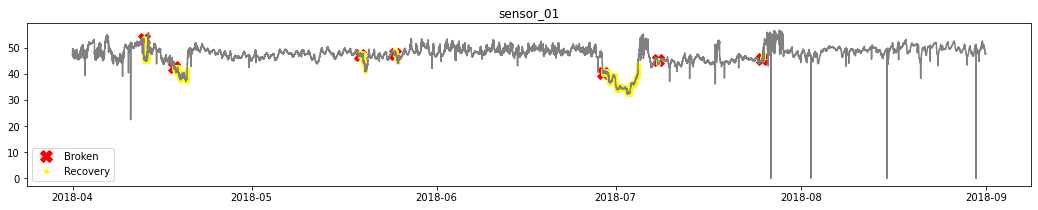

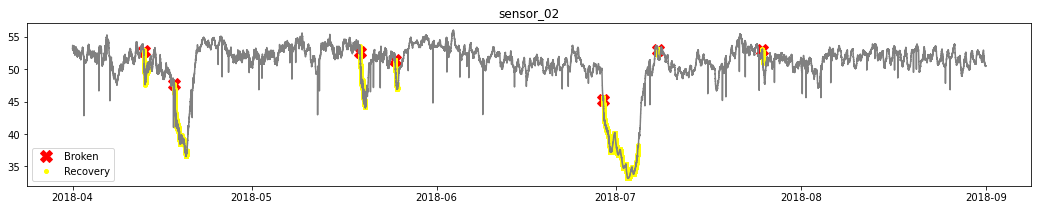

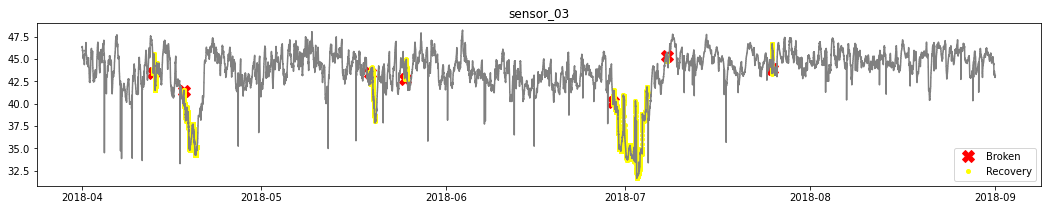

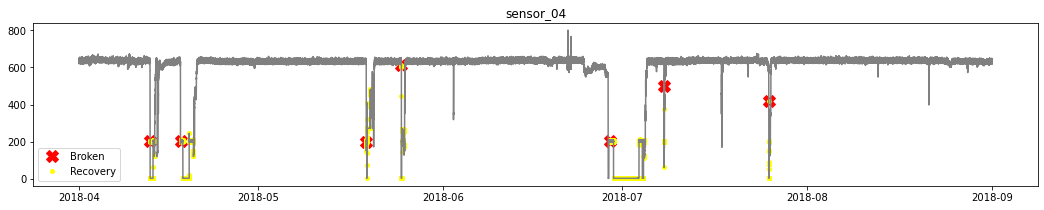

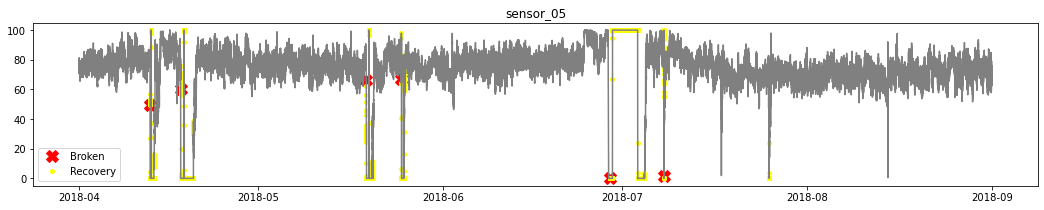

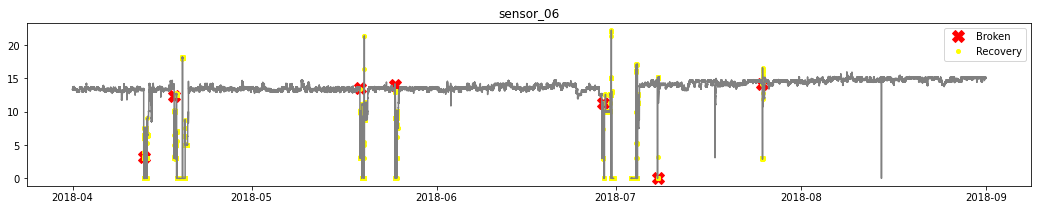

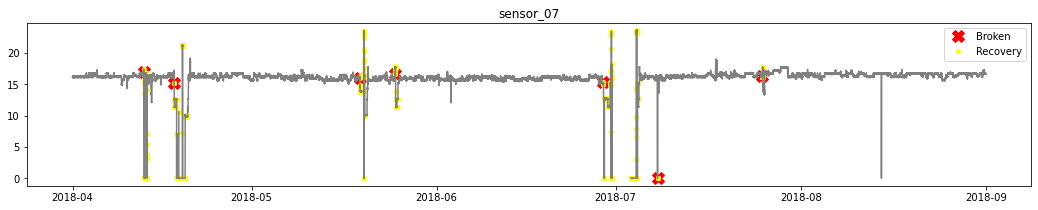

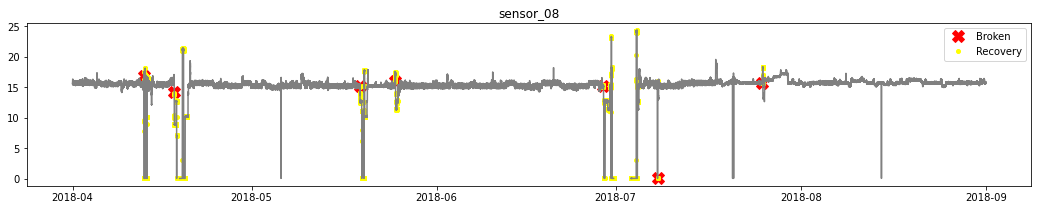

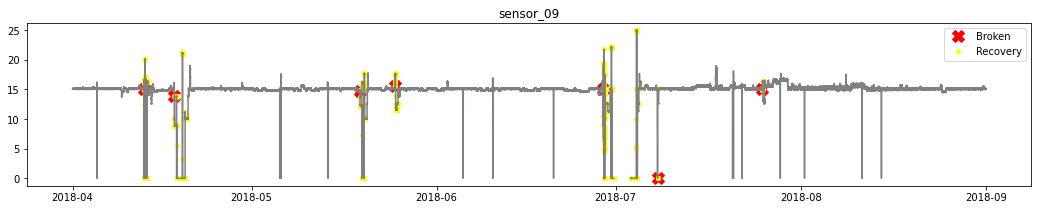

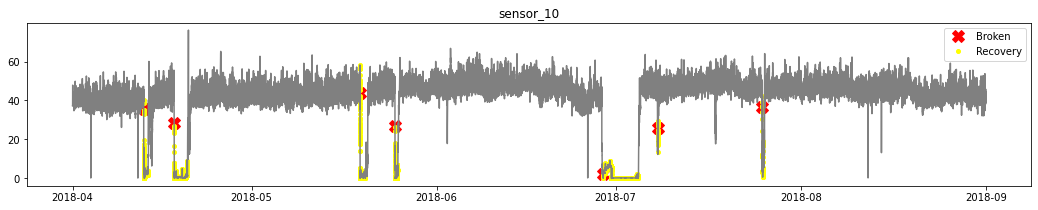

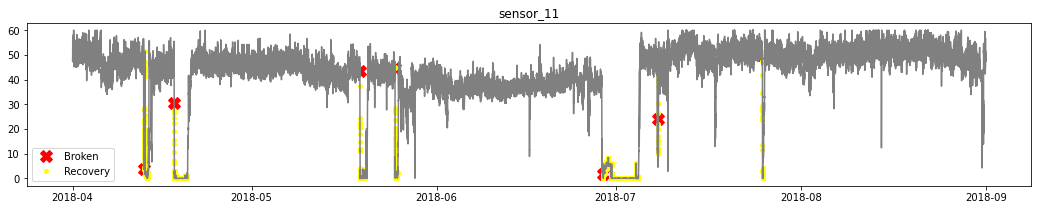

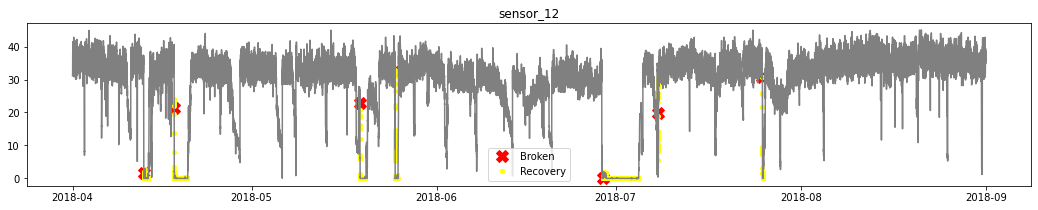

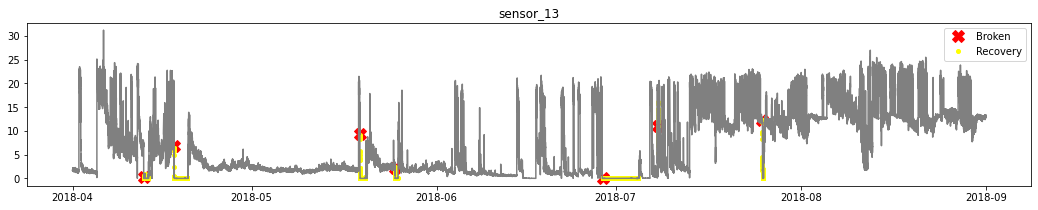

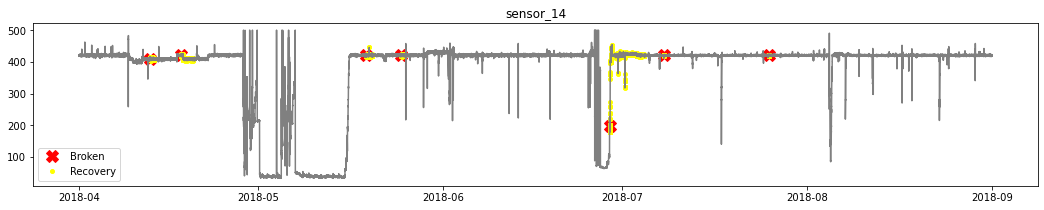

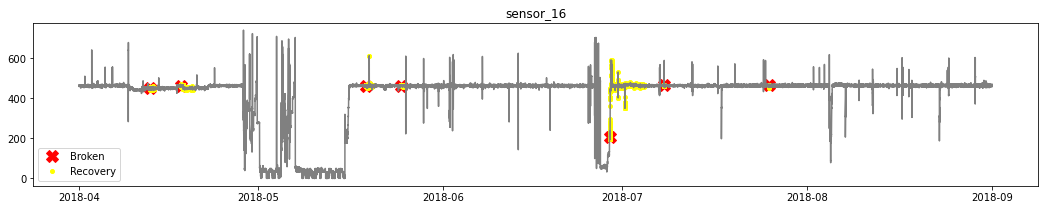

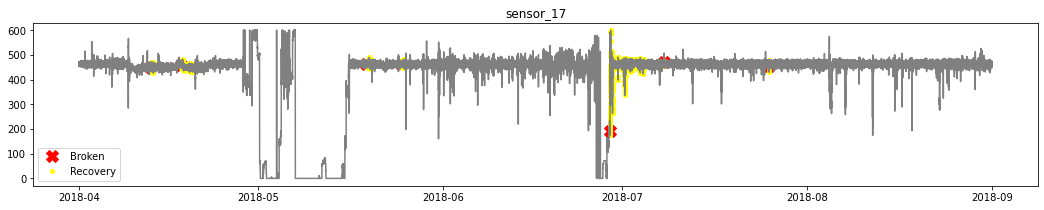

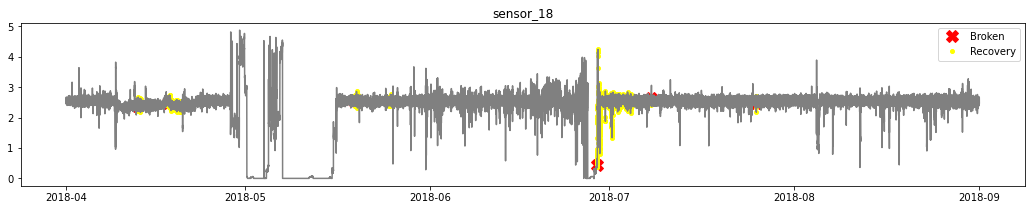

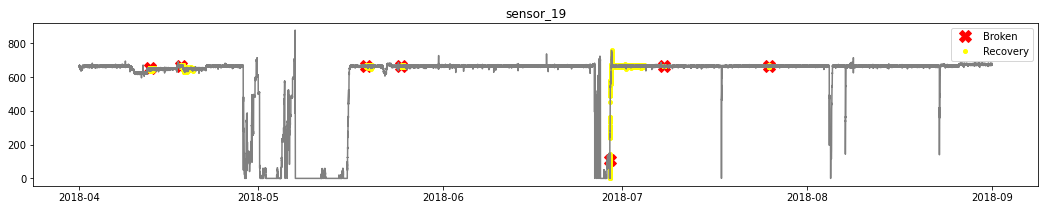

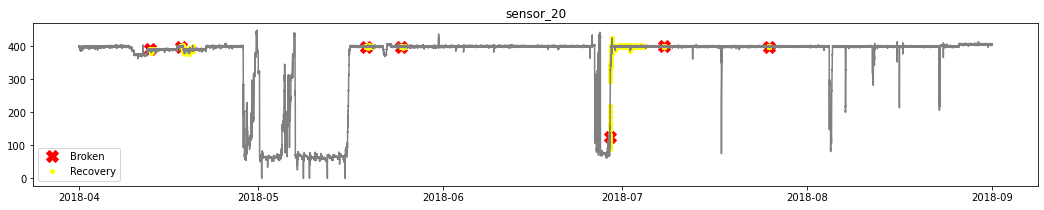

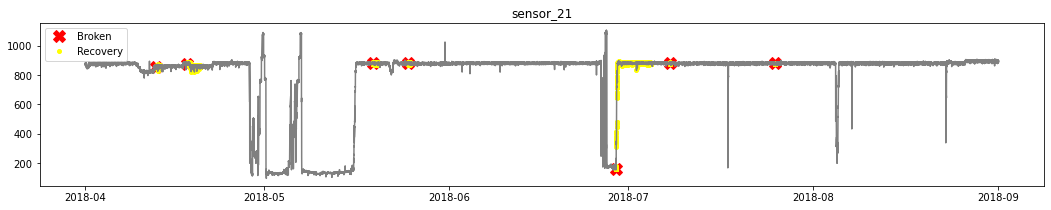

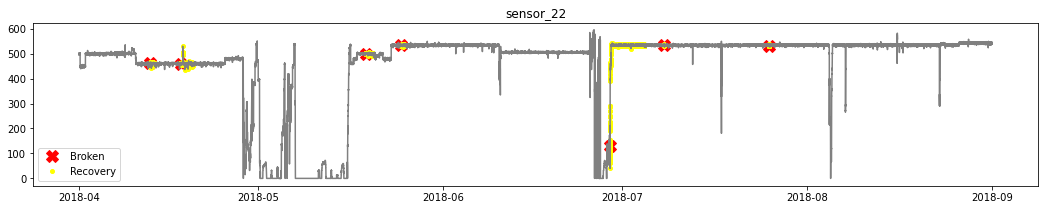

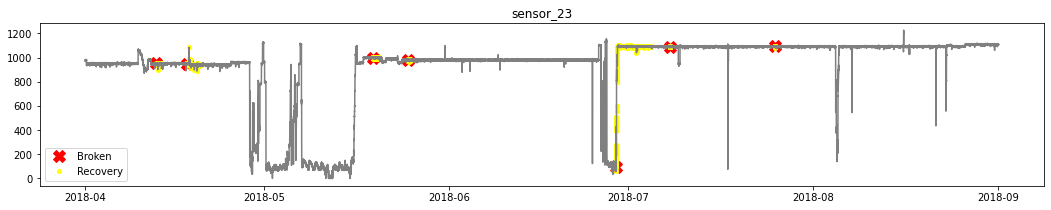

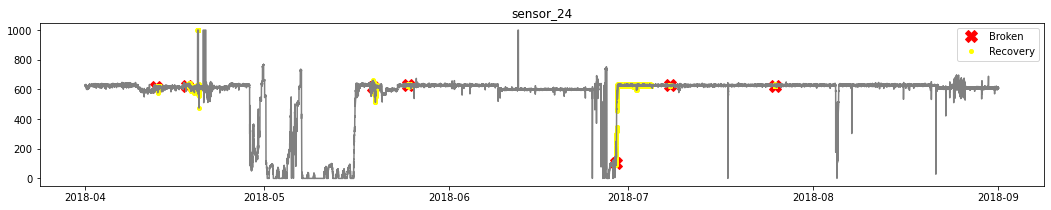

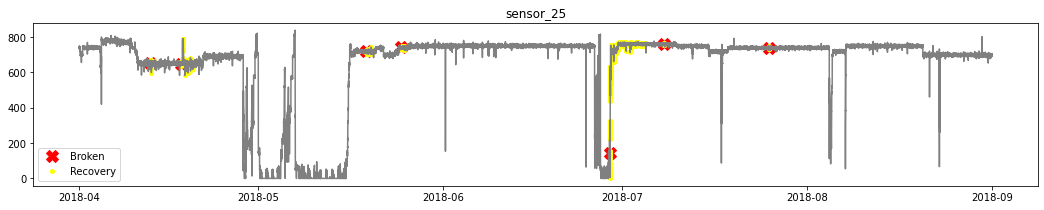

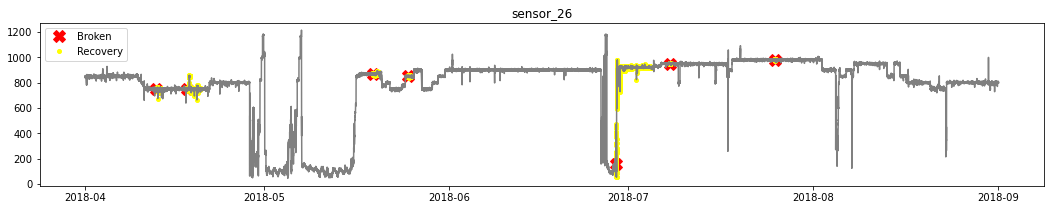

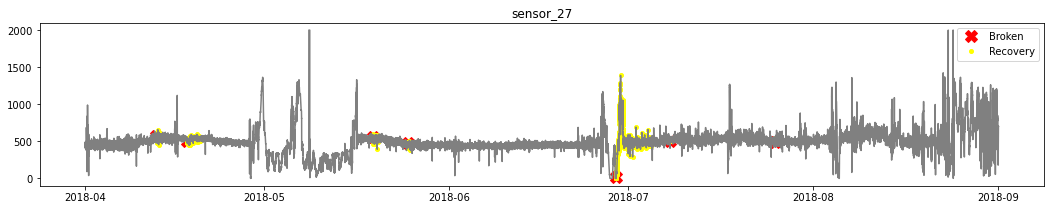

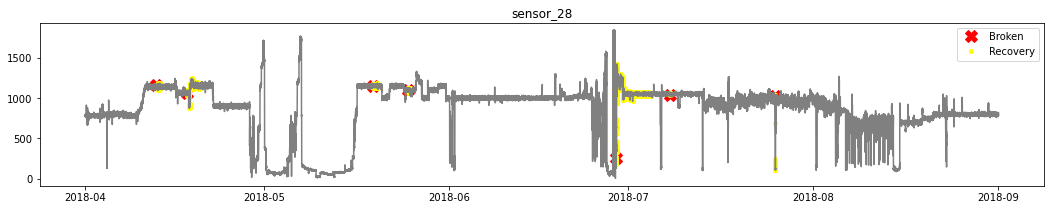

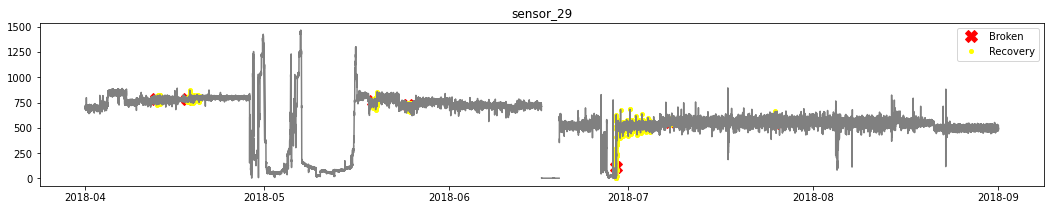

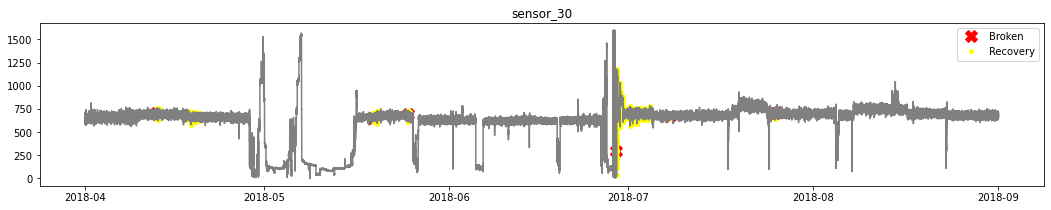

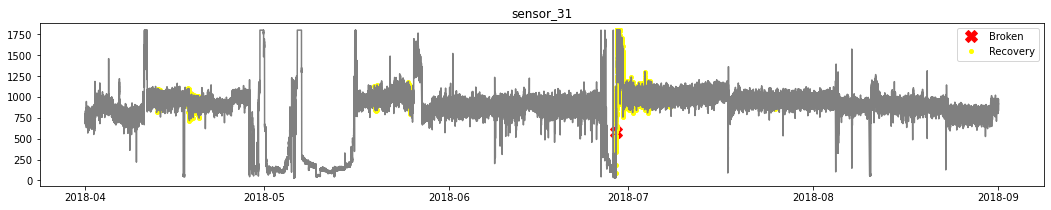

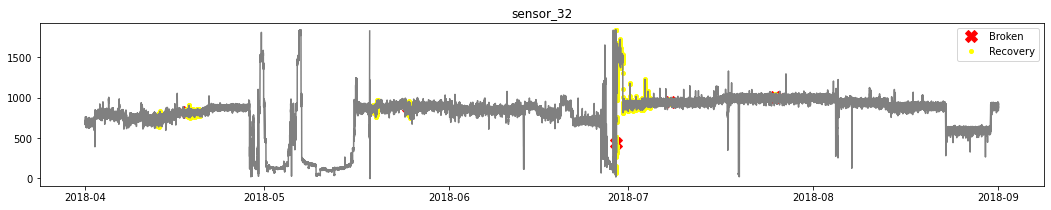

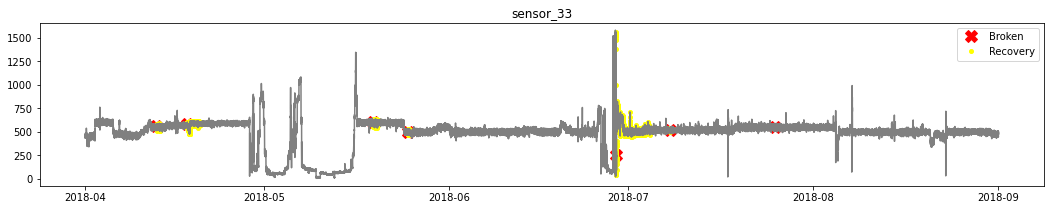

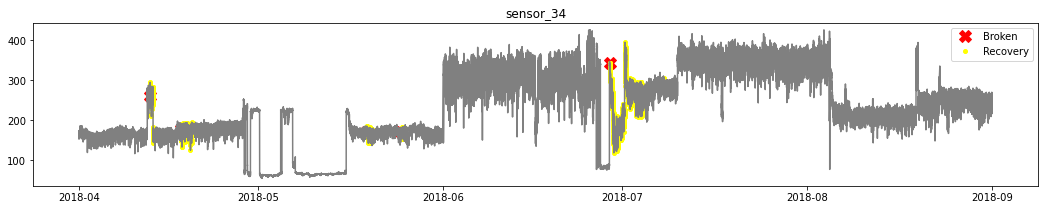

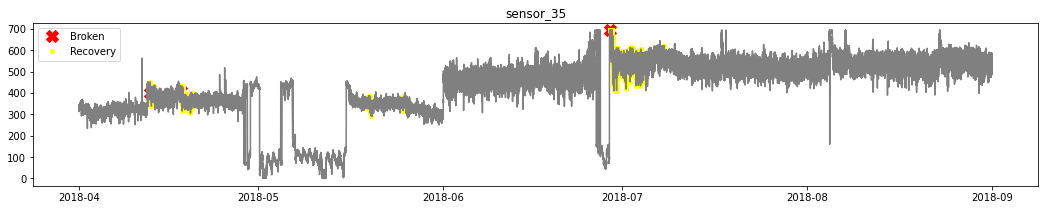

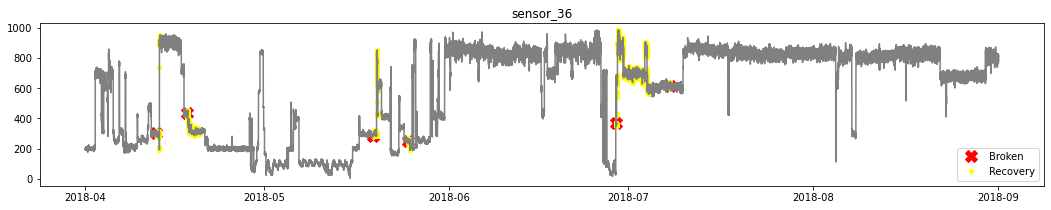

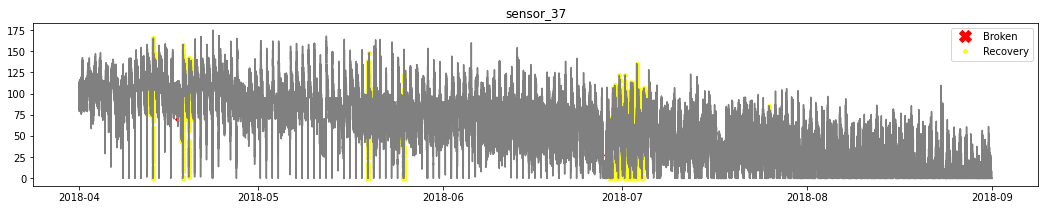

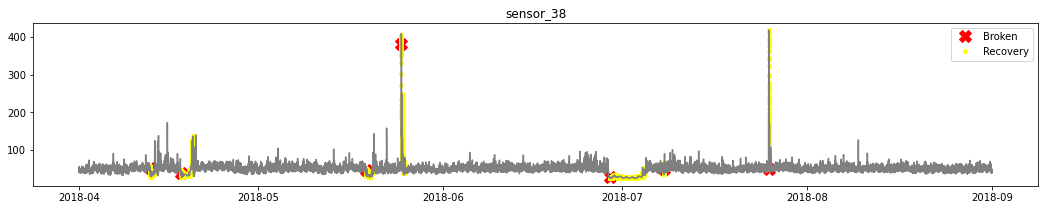

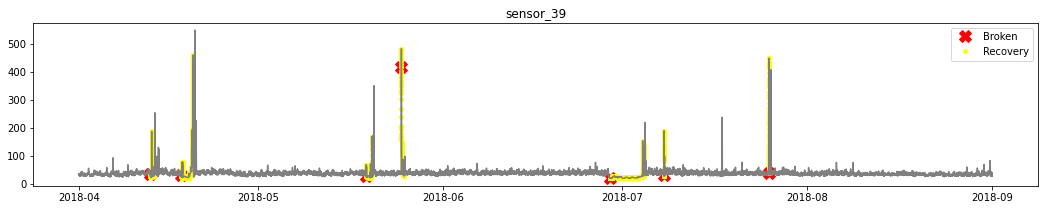

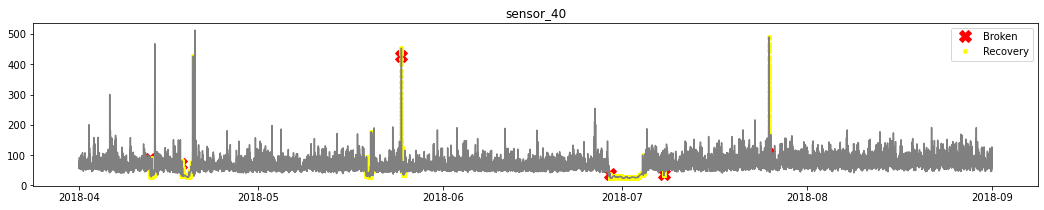

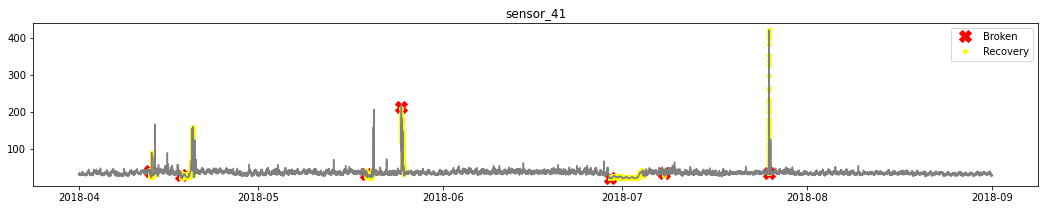

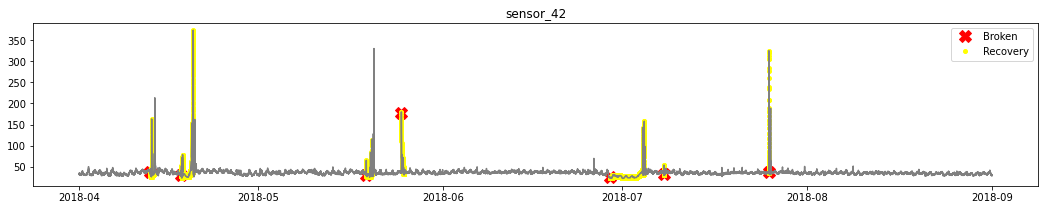

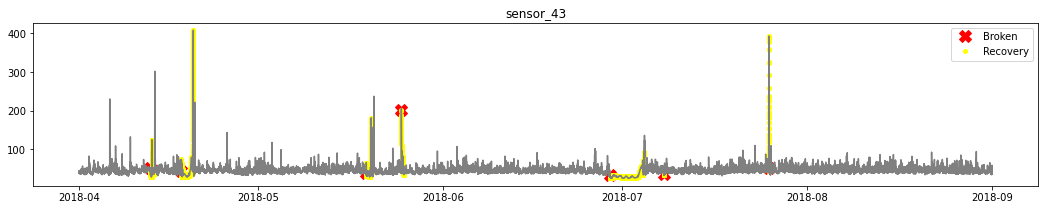

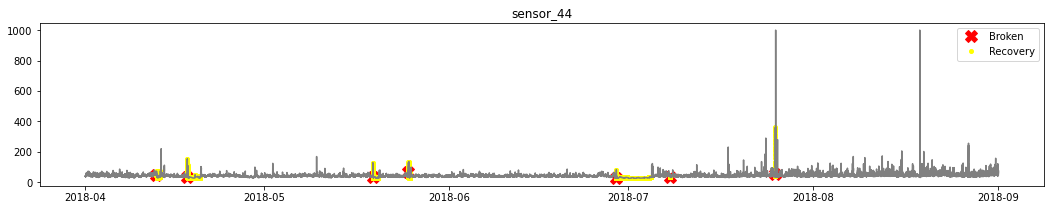

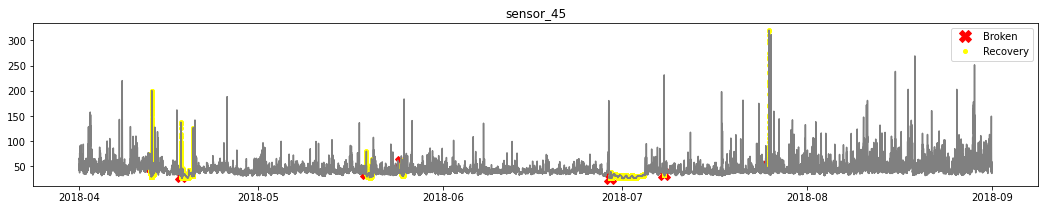

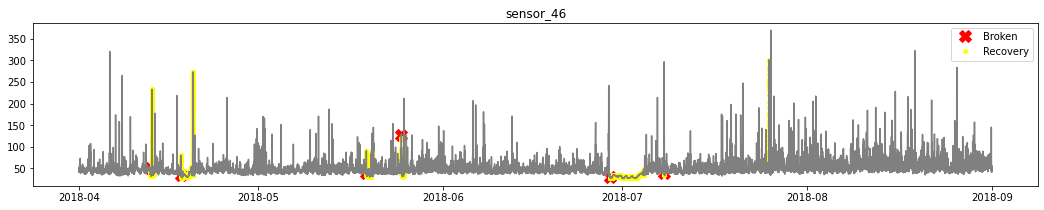

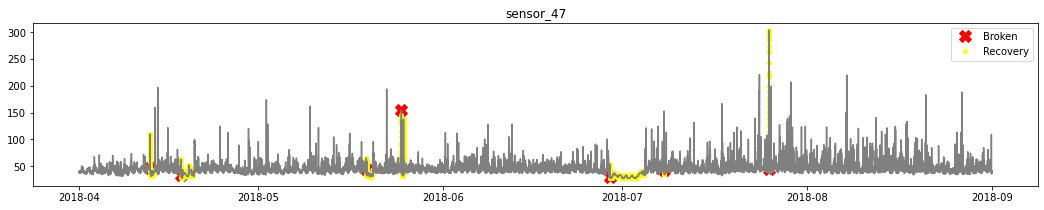

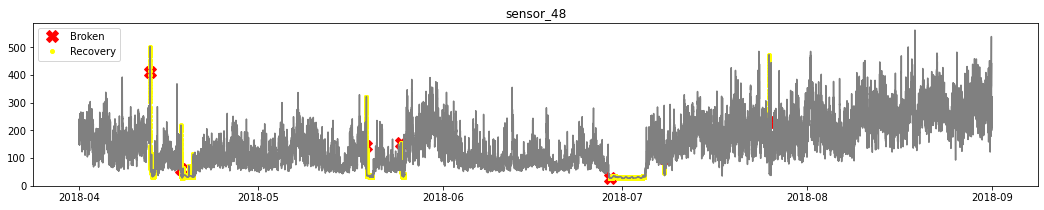

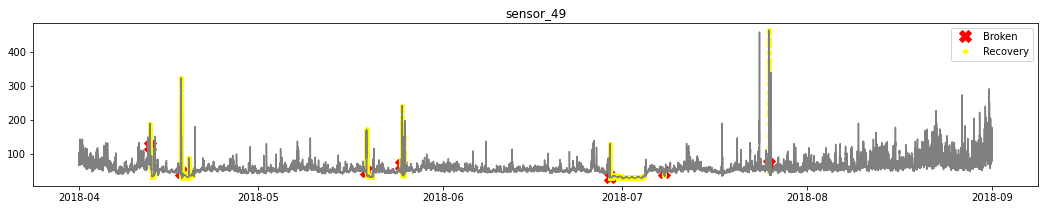

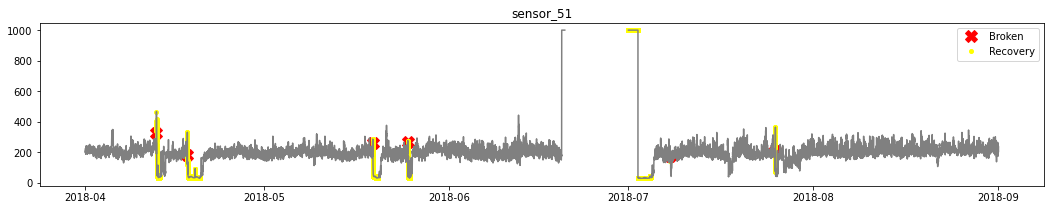

In [33]:
sensors = df_2.columns
plot_machine_plot(sensors)

### Machine Learning 

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
#scaling
scaler=StandardScaler()
sensor = df_2.columns
X= scaler.fit_transform(df_2)
X = pd.DataFrame(X,columns=sensor)

In [37]:
X.shape

(220320, 50)

In [38]:
X = X.fillna(X.mean())
X.shape

(220320, 50)

## Principal Component Analysis

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [41]:
pca = PCA(n_components=2)
Pcomponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data = Pcomponents,columns=['pca1','pca2'])

###  K-Means Clusting

In [44]:
from sklearn.cluster import KMeans

In [45]:
# fit k-means
kmeans = KMeans(n_clusters=2,random_state=13)
kmeans.fit(pca_df.values)

KMeans(n_clusters=2, random_state=13)

In [46]:
labels = kmeans.predict(pca_df.values)

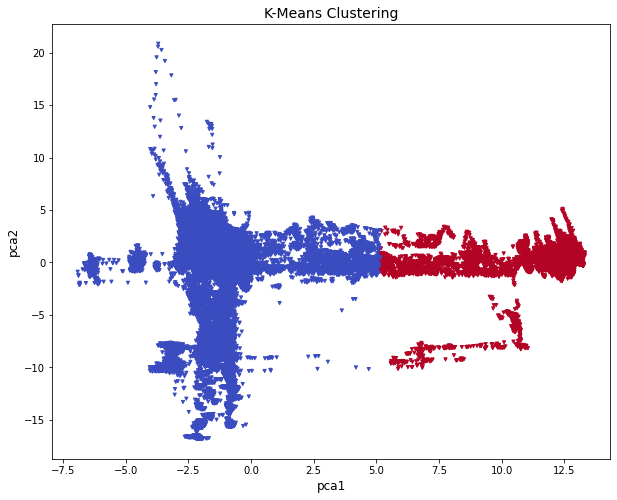

In [54]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['pca1'], pca_df['pca2'], c=labels, cmap='coolwarm', s=10,marker='v')
plt.xlabel('pca1', fontsize=12)
plt.ylabel('pca2', fontsize=12)
plt.title('K-Means Clustering', fontsize=14)

plt.show()

### Distance-based

In [55]:
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster,
        arguments: 
                  data: The dataset for which the distances need to be calculated.
                  model: The trained K-means clustering model used to obtain the cluster assignments and cluster centers.
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        #model.labels_[i] returns the cluster label for the current data point,
        #and model.cluster_centers_ is an array that contains the coordinates of the cluster centroids.
        Xb = model.cluster_centers_[model.labels_[i]-1]
        #The Euclidean distance between Xa and Xb is calculated using np.linalg.norm(Xa-Xb).
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [56]:
outliers_fraction = 1 - (len(normal_rows)/(len(df)))

In [57]:
distance = getDistanceByPoint(pca_df, kmeans)

In [58]:
number_of_outliers = int(outliers_fraction*len(distance))

In [59]:
#number_of_outliers largest distances from the distance series.
#This gives a series containing the number_of_outliers largest distances in descending order.
#min() returns the smallest value among the selected largest distances.
threshold = distance.nlargest(number_of_outliers).min()

# kmean_anomaly contains the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
pca_df['kmeans_anomaly'] = (distance >= threshold).astype(int)

In [60]:
#adding kmean anomaly to pca model
pca_df.head()

,pca1,pca2,kmeans_anomaly
0,-0.046262,0.487293,0
1,-0.046262,0.487293,0
2,-0.186402,0.498262,0
3,-0.186771,0.534323,0
4,-0.142831,0.643276,0


In [61]:
pca_df["kmeans_anomaly"].value_counts()

0    205836
1     14484
Name: kmeans_anomaly, dtype: int64

In [62]:
dfBroken = df[df["machine_status"]=="BROKEN"]

In [67]:
# kmean anomaly over sensors
def kmean_anomaly_plot(sensor):
    """function that will plot the machine_ status and kmean_anomaly of
        each sensors
        arguments: sensors- list of column names from the data frame"""
    #adding kmean_anomaly to orginal data frame
    df['kmeans_anomaly'] = pd.Series(pca_df['kmeans_anomaly'].values, index=df.index)
    anomaly = df[df['kmeans_anomaly'] == 1]#anomaly
    plt.figure(figsize=(18,6))
    plt.plot(df[sensor], color='green', label='Normal')
    plt.plot(anomaly[sensor], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
    plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
    plt.xlabel('Time series')
    plt.ylabel('Sensor Reading')
    plt.title(sensor + 'Anomalies')
    plt.legend(loc='best')
    plt.show()

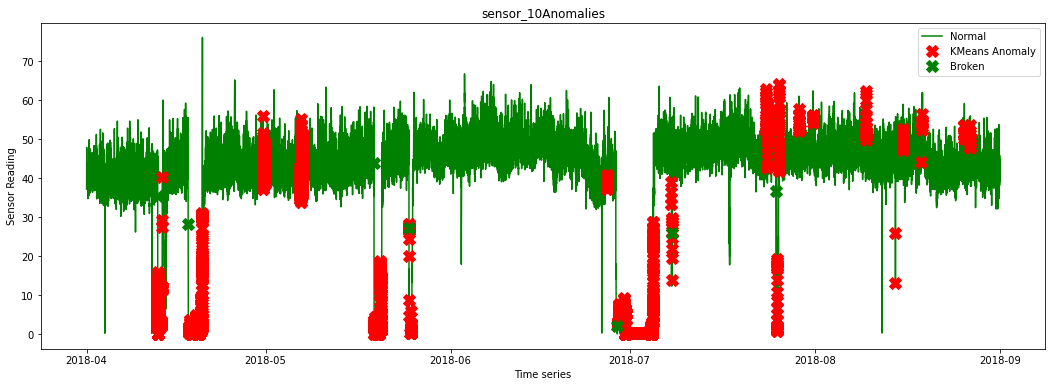

In [70]:
kmean_anomaly_plot('sensor_10')

There is considerable overlap between many of the K-means anomaly plots and the broken category. The presence of outliers in the data could be influencing this outcome. Removing these outliers might lead to clearer results. Currently, the results are not meeting expectations

In [71]:
#Save the output of the K-means anomaly detection to a CSV file.
df[['machine_status', 'kmeans_anomaly']].to_csv('output.csv')
df_result = pd.read_csv('output.csv')

In [72]:
print(df_result)

                  timestamp machine_status  kmeans_anomaly
0       2018-04-01 00:00:00         NORMAL               0
1       2018-04-01 00:01:00         NORMAL               0
2       2018-04-01 00:02:00         NORMAL               0
3       2018-04-01 00:03:00         NORMAL               0
4       2018-04-01 00:04:00         NORMAL               0
...                     ...            ...             ...
220315  2018-08-31 23:55:00         NORMAL               0
220316  2018-08-31 23:56:00         NORMAL               0
220317  2018-08-31 23:57:00         NORMAL               0
220318  2018-08-31 23:58:00         NORMAL               0
220319  2018-08-31 23:59:00         NORMAL               0

[220320 rows x 3 columns]


In [78]:
from sklearn.ensemble import IsolationForest

isolation_forest_model = IsolationForest()
isolation_forest_model.fit(df_result)
outliers_predictions = isolation_forest_model.predict(df_result)


def plot_sensor_anomolies(sensor, name):
    anomoly_rows = df_result[df_result[f'{name}'] == -1]
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering',alpha = 0.5)
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')
    plot = plt.plot(anomoly_rows[sensor], linestyle='none', marker='X', color='blue', markersize=4, label='anomoly predicted', alpha = 0.1)
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

ValueError: could not convert string to float: '2018-04-01 00:00:00'

In [79]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

KeyError: 'Isolation Forest'